In [1]:
import sys
sys.path.append('/Users/apple/Desktop/DATA_590/HTI/src')
import pandas as pd
from dimensionality_reduction import principal_component_analysis, view_principal_components
from dimensionality_reduction import get_features_below_threshold, plot_variance_explained, return_csv

# PCA FOR PERINUCLEAR REGION 

In [2]:
pd.set_option('display.max_columns', None)
df_perinuclear = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjPerinuclear.csv', 
                            low_memory = False)

In [3]:
df_perinuclear.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

In [4]:
pca, columns= principal_component_analysis(df_perinuclear,number_of_column = 25)

/Users/apple/miniconda3/envs/main/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


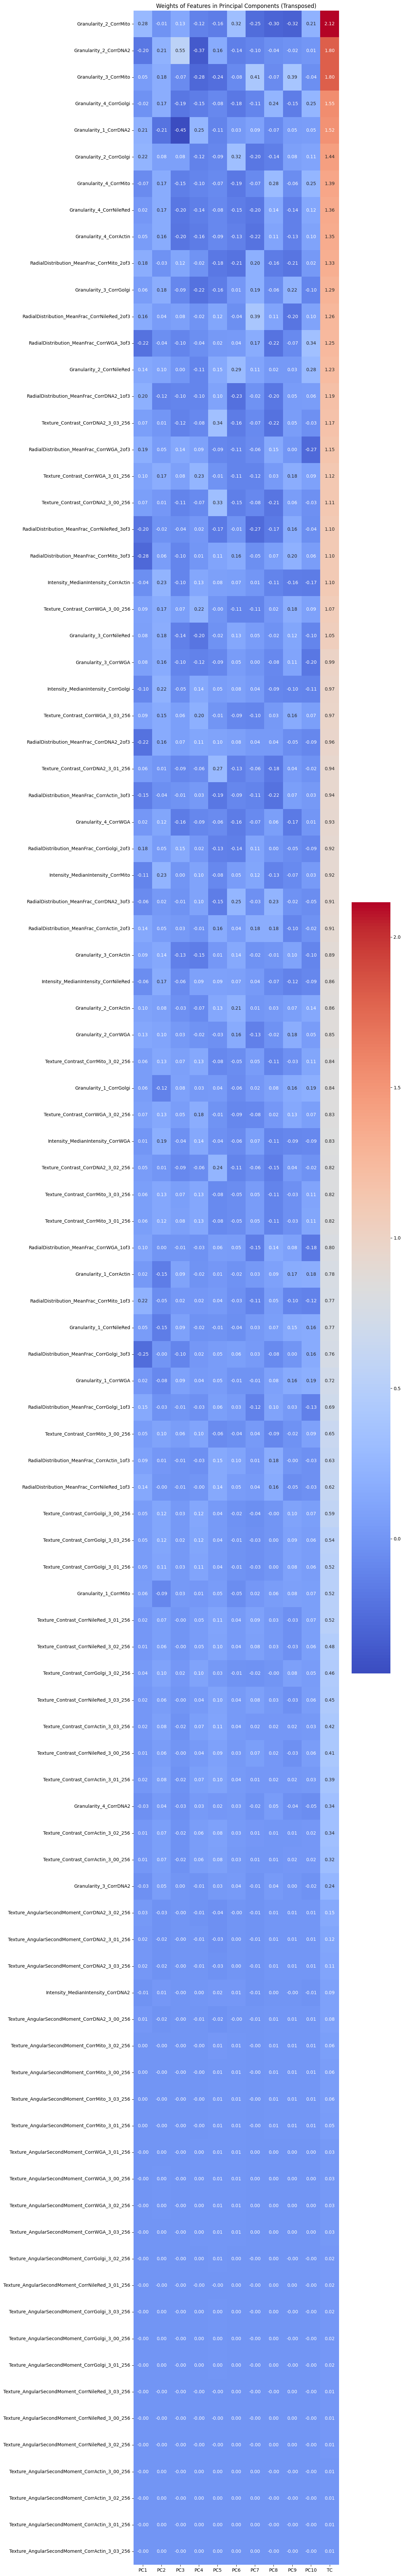

In [5]:
figure, weights_df_T = view_principal_components(pca,columns, number_of_components = 10)

In [6]:
weights_df_T.head()

0         1         2         3         4  \
Granularity_2_CorrMito   0.279627 -0.009940  0.134535 -0.124040 -0.155250   
Granularity_2_CorrDNA2  -0.195679  0.214190  0.551970 -0.367434  0.161212   
Granularity_3_CorrMito   0.047320  0.181810 -0.067142 -0.283720 -0.238874   
Granularity_4_CorrGolgi -0.024449  0.173459 -0.187901 -0.150504 -0.082901   
Granularity_1_CorrDNA2   0.210160 -0.211461 -0.447677  0.253054 -0.111242   

                                5         6         7         8         9  \
Granularity_2_CorrMito   0.324938 -0.248986 -0.304794 -0.319221  0.214266   
Granularity_2_CorrDNA2  -0.144999 -0.103040 -0.040374 -0.017890  0.008047   
Granularity_3_CorrMito  -0.076323  0.407246 -0.065976  0.388456 -0.040317   
Granularity_4_CorrGolgi -0.182606 -0.107027  0.241591 -0.149084  0.247153   
Granularity_1_CorrDNA2   0.029827  0.089647 -0.069043  0.045592  0.053377   

                         sum_of_abs_weights  
Granularity_2_CorrMito             2.115597  
Granularity_2_CorrDNA2             1.804835  
Granularity_3_CorrMito             1.797183  
Granularity_4_CorrGolgi            1.546674  
Granularity_1_CorrDNA2             1.521080

In [7]:
return_csv(weights_df_T,'/Users/apple/Desktop/Data_590/HTI/files/pca_perinuclear.csv')

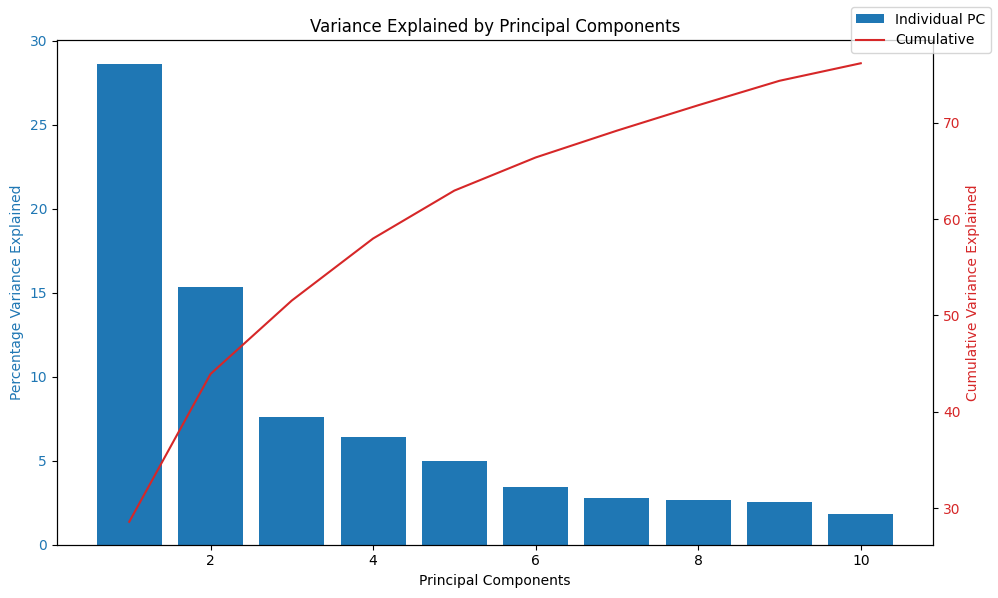

In [8]:
plot_variance_explained(pca)

In [9]:
_, features_to_drop_perinuclear = get_features_below_threshold(weights_df_T,0.24)


# PCA for the Entire Cell

In [10]:
df_cell = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjCell.csv', 
                            low_memory = False)

In [11]:
df_cell.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

In [12]:
pca_cell, columns_cell = principal_component_analysis(df_cell,number_of_column = 25)

/Users/apple/miniconda3/envs/main/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


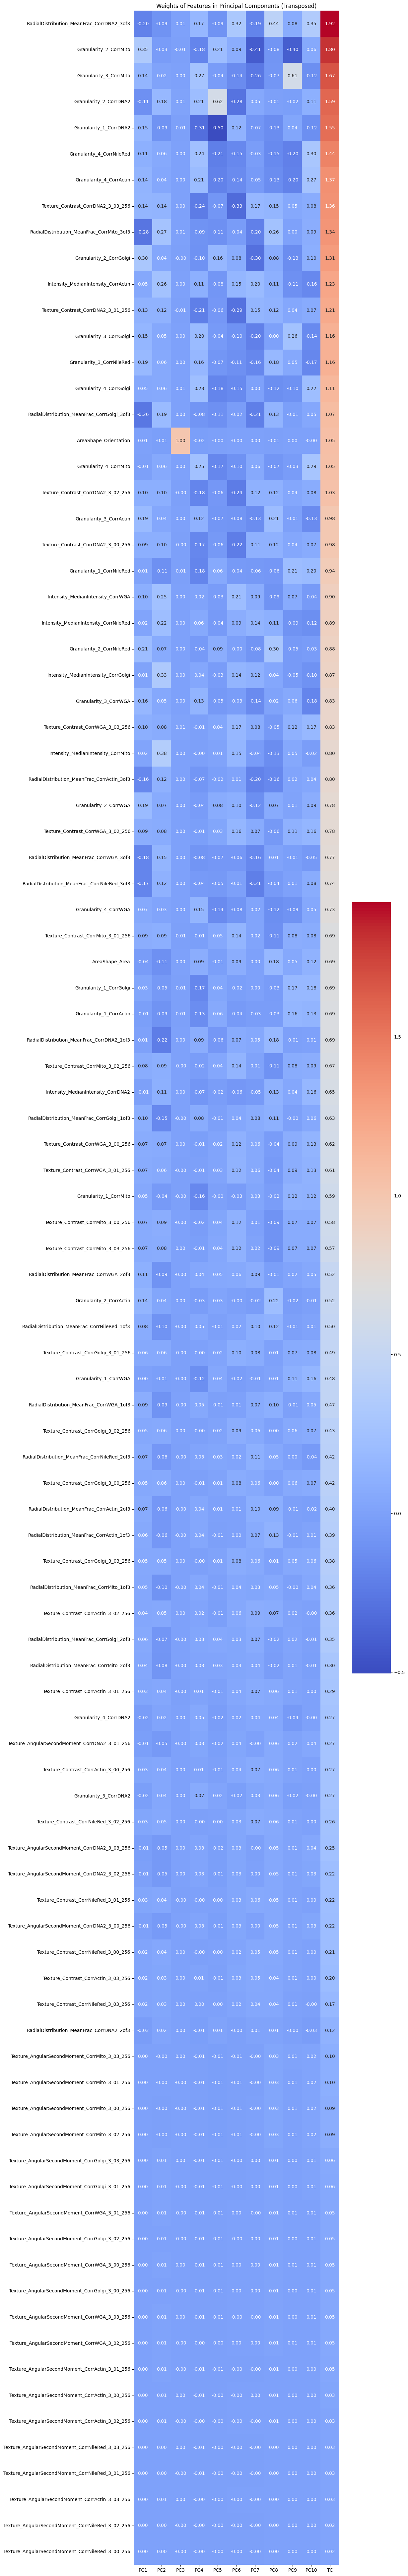

In [13]:
figure_cell, weights_df_T_cell = view_principal_components(pca_cell,columns_cell, number_of_components = 10)

In [14]:
return_csv(weights_df_T_cell,'/Users/apple/Desktop/Data_590/HTI/files/pca_cell.csv')

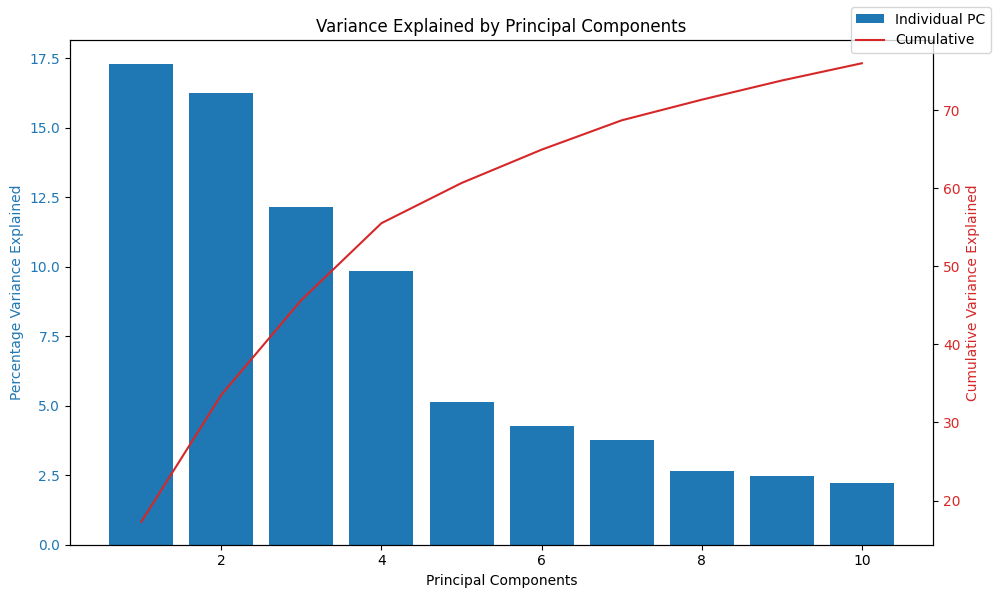

In [15]:
plot_variance_explained(pca_cell)

In [16]:
_, features_to_drop_allcell = get_features_below_threshold(weights_df_T_cell,0.24)

# PCA FOR ALL CYTO 

In [17]:
df_all_cyto = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjAllcyto.csv', 
                            low_memory = False)

In [18]:
df_all_cyto.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

In [19]:
pca_all_cyto, columns_all_cyto = principal_component_analysis(df_all_cyto,number_of_column = 25)

/Users/apple/miniconda3/envs/main/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


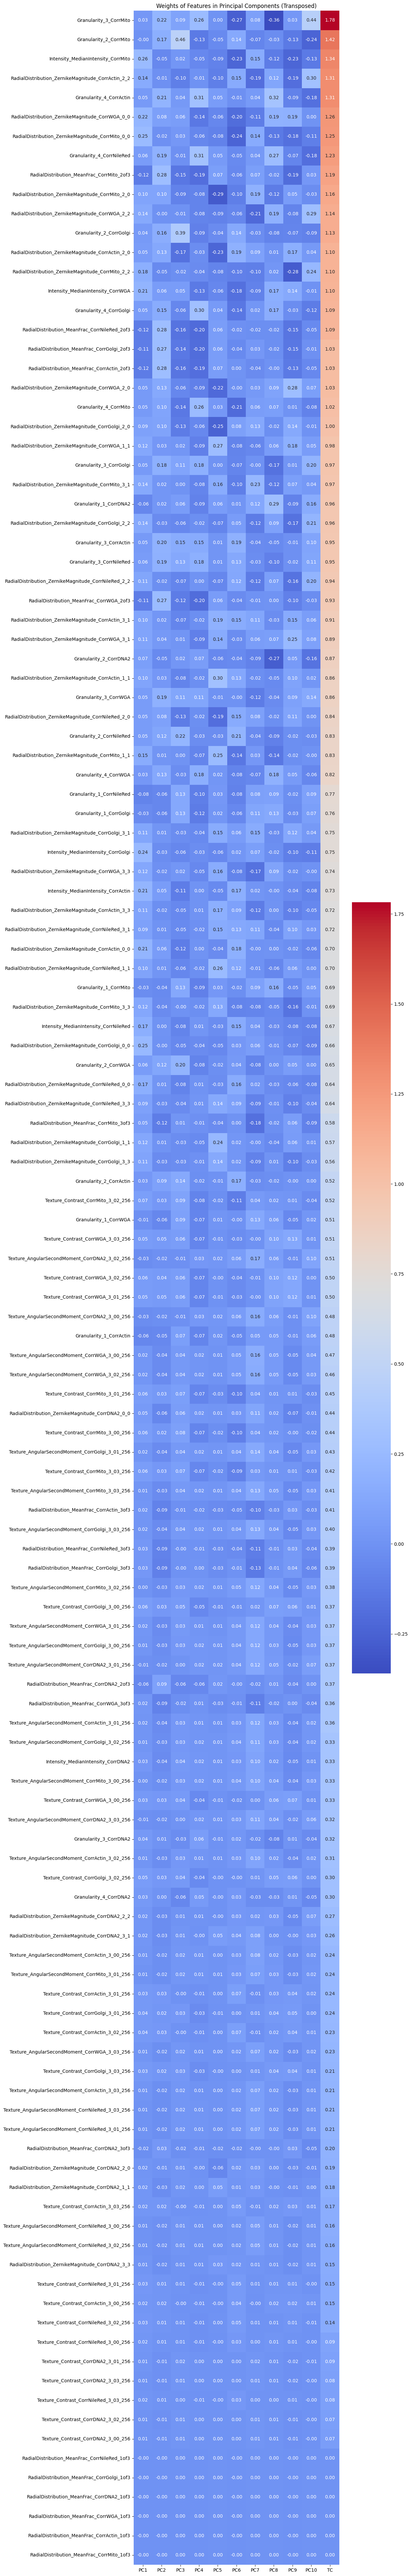

In [20]:
figure_all_cyto, weights_df_T_all_cyto = view_principal_components(pca_all_cyto,
                                                                   columns_all_cyto, number_of_components = 10)

In [21]:
return_csv(weights_df_T_all_cyto,'/Users/apple/Desktop/Data_590/HTI/files/pca_all_cyto.csv')

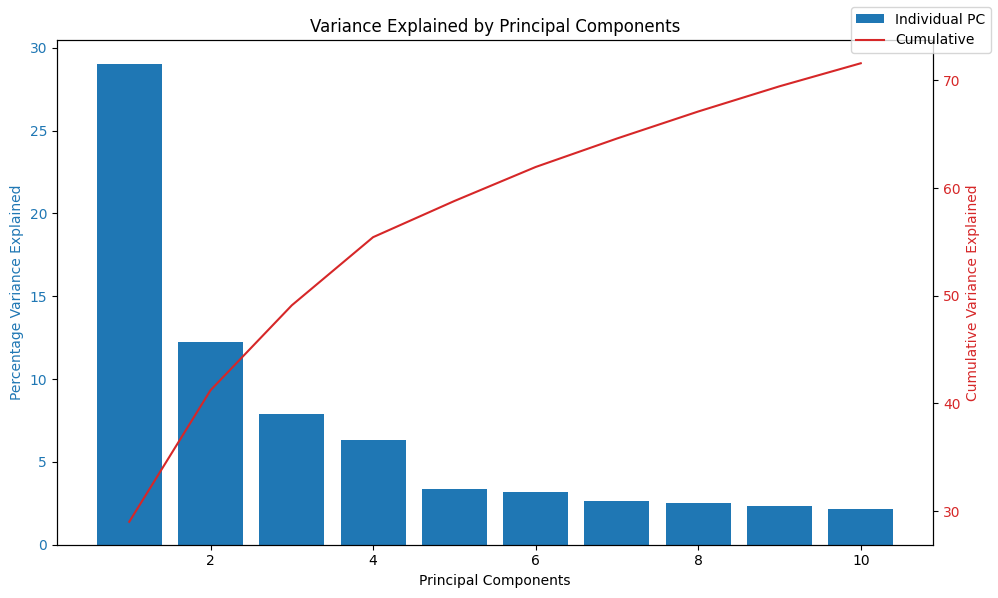

In [22]:
plot_variance_explained(pca_all_cyto)

In [23]:
_, features_to_drop_allcyto = get_features_below_threshold(weights_df_T_cell,0.24)

# PCA FOR ONLY NUCLEI

In [24]:
df_nuclei = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjNuclei.csv', 
                            low_memory = False)

In [25]:
df_nuclei.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

Has nothing to perform PCA on

# PCA for Perinculear Cyto

In [26]:
df_perinucCyto = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjPerinucCyto.csv', 
                            low_memory = False)

In [27]:
df_perinucCyto.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

In [28]:
pca_perinucCyto, columns_perinucCyto= principal_component_analysis(df_perinucCyto,number_of_column = 25)

/Users/apple/miniconda3/envs/main/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


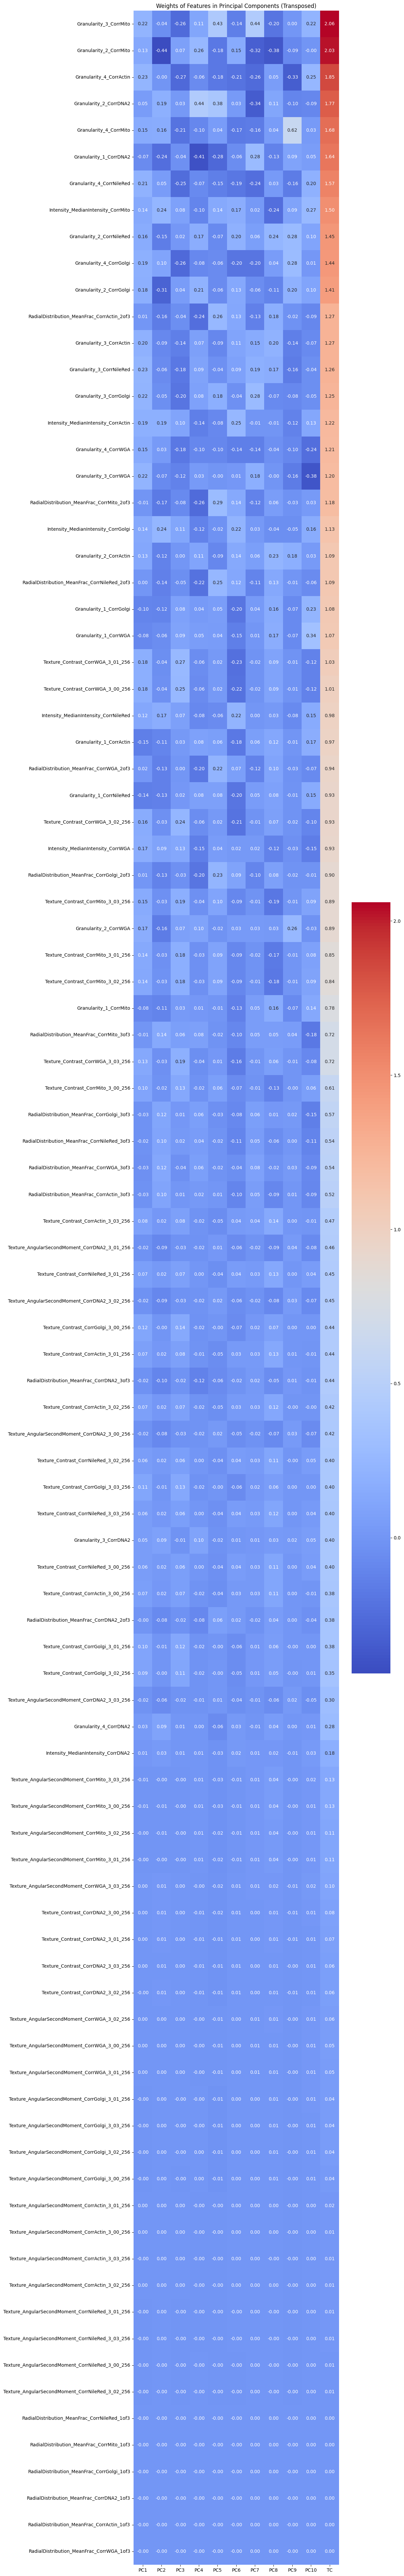

In [29]:
figure_perinucCyto, weights_df_T_perinucCyto = view_principal_components(pca_perinucCyto,
                                                                   columns_perinucCyto, number_of_components = 10)

In [30]:
return_csv(weights_df_T_perinucCyto,'/Users/apple/Desktop/Data_590/HTI/files/pca_perinucCyto.csv')

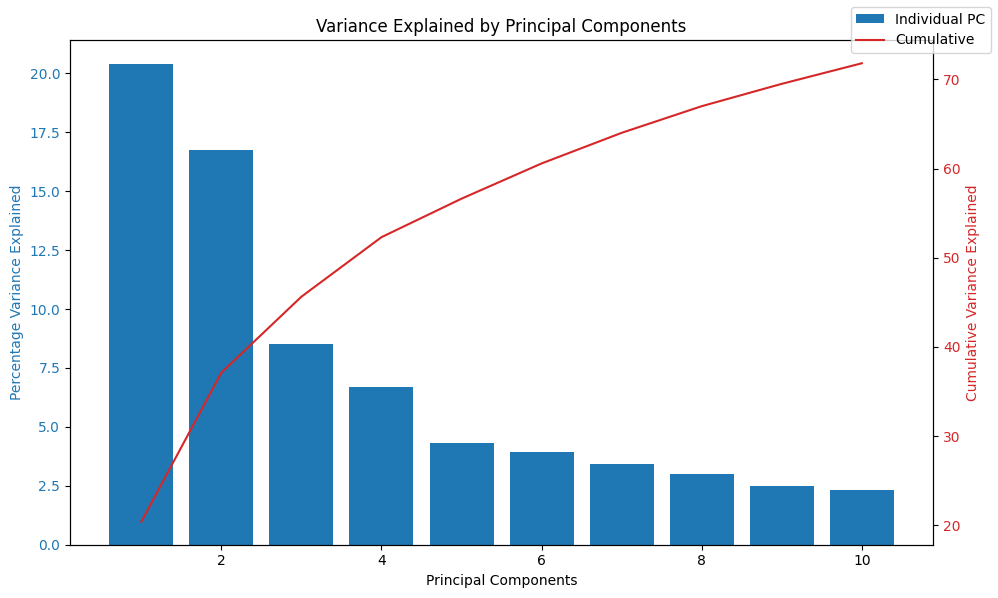

In [31]:
plot_variance_explained(pca_perinucCyto)

In [32]:
_, features_to_drop_pericyto = get_features_below_threshold(weights_df_T_cell,0.24)

# DROP COLUMNS IDENTIFIED FROM PCA

In [38]:
updated_df_perinuclear = df_perinuclear.drop(features_to_drop_perinuclear, axis =1)
updated_df_cell = df_cell.drop(features_to_drop_allcell, axis=1)
updated_df_all_cyto = df_all_cyto.drop(features_to_drop_allcyto, axis =1)
updated_df_perinucCyto = df_perinucCyto.drop(features_to_drop_pericyto, axis =1)

In [34]:
updated_df_perinuclear.head()

ImageNumber  ObjectNumber  Metadata_Date  Metadata_FileLocation  \
0            1             1            NaN                    NaN   
1            1             2            NaN                    NaN   
2            1             3            NaN                    NaN   
3            1             4            NaN                    NaN   
4            1             5            NaN                    NaN   

   Metadata_Frame Metadata_Metadata_Cytokine  Metadata_Metadata_Dose  \
0               0                       IFNg                      33   
1               0                       IFNg                      33   
2               0                       IFNg                      33   
3               0                       IFNg                      33   
4               0                       IFNg                      33   

  Metadata_Plate  Metadata_Run  Metadata_Series Metadata_Well  \
0        Plate 1           NaN                0           B10   
1        Plate 1           NaN                0           B10   
2        Plate 1           NaN                0           B10   
3        Plate 1           NaN                0           B10   
4        Plate 1           NaN                0           B10   

                 FileName_Actin             FileName_DNA  \
0  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
1  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
2  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
3  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   
4  B10_01_4_1_Texas Red_001.tif  B10_01_1_1_DAPI_001.tif   

             FileName_DNA2          FileName_Golgi           FileName_Mito  \
0  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
1  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
2  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
3  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   
4  B10_01_1_1_DAPI_001.tif  B10_01_2_1_GFP_001.tif  B10_01_3_1_CY5_001.tif   

         FileName_NileRed            FileName_WGA  \
0  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
1  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
2  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
3  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   
4  B10_01_3_1_RFP_001.tif  B10_01_2_1_GFP_001.tif   

                                      PathName_Actin  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                        PathName_DNA  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_DNA2  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                      PathName_Golgi  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/CloudStorage/Bo...   
4  /Users/carolinestefani/Library/CloudStorage/Bo...   

                                       PathName_Mito  \
0  /Users/carolinestefani/Library/CloudStorage/Bo...   
1  /Users/carolinestefani/Library/CloudStorage/Bo...   
2  /Users/carolinestefani/Library/CloudStorage/Bo...   
3  /Users/carolinestefani/Library/Clo

In [59]:
print(f'Shape of perinuclear data before PCA feature being dropped: {df_perinuclear.shape},\
 and after: {updated_df_perinuclear.shape},\nthe columns dropped are:\
 {df_perinuclear.shape[1] - updated_df_perinuclear.shape[1]}')

print(f'Shape of all cell data before PCA feature being dropped: {df_cell.shape},\
 and after: {updated_df_cell.shape},\nthe columns dropped are:\
 {df_cell.shape[1] - updated_df_cell.shape[1]}')

print(f'Shape of all cyto data before PCA feature being dropped: {df_all_cyto.shape},\
 and after: {updated_df_all_cyto.shape},\nthe columns dropped are:\
 {df_all_cyto.shape[1] - updated_df_all_cyto.shape[1]}')

print(f'Shape of peri cyto data before PCA feature being dropped: {df_perinucCyto.shape},\
 and after: {updated_df_perinucCyto.shape},\nthe columns dropped are:\
 {df_perinucCyto.shape[1] - updated_df_perinucCyto.shape[1]}')

Shape of perinuclear data before PCA feature being dropped: (90775, 121), and after: (90775, 96),
the columns dropped are: 25
Shape of all cell data before PCA feature being dropped: (94370, 123), and after: (94370, 96),
the columns dropped are: 27
Shape of all cyto data before PCA feature being dropped: (94370, 157), and after: (94370, 130),
the columns dropped are: 27
Shape of peri cyto data before PCA feature being dropped: (90775, 121), and after: (90775, 94),
the columns dropped are: 27


In [64]:
updated_df_perinuclear.to_pickle('/Users/apple/Desktop/DATA_590/cleaned_data/PAM194_Keratino_CytoPanel_1/\
pam194ObjPerinuclear.pkl')
updated_df_cell.to_pickle('/Users/apple/Desktop/DATA_590/cleaned_data/PAM194_Keratino_CytoPanel_1/\
pam194ObjCell.pkl')
updated_df_all_cyto.to_pickle('/Users/apple/Desktop/DATA_590/cleaned_data/PAM194_Keratino_CytoPanel_1/\
pam194ObjAllCyto.pkl')
updated_df_perinucCyto.to_pickle('/Users/apple/Desktop/DATA_590/cleaned_data/PAM194_Keratino_CytoPanel_1/\
pam194ObjPerinucCyto.pkl')